# Regression for lung diseases together

In [59]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

## Prepare data

In [60]:
pd.set_option('display.max_columns',None)

In [61]:
data = pd.read_csv('finaldata_clusters_regions_Added.csv').drop(columns = ['Unnamed: 0'])

## Converting to correct data formats

In [62]:
data['Total Sq. Mi.']=data['Total Sq. Mi.'].str.replace(',','')

In [63]:
data['Total Sq. Mi.'] = data['Total Sq. Mi.'].astype('int64') 

## Creating Ratios

In [64]:
data['CO2_PER_POP'] = data['CO2'] / data['Population']
data['CO2_PER_SQUARE'] = data['CO2'] / data['Total Sq. Mi.']
data['CH4_PER_POP'] = data['CH4'] / data['Population']
data['CH4_PER_SQUARE'] = data['CH4'] / data['Total Sq. Mi.']
data['N2O_PER_POP'] = data['N2O'] / data['Population']
data['N2O_PER_SQUARE'] = data['N2O'] / data['Total Sq. Mi.']
data['Fluorinated GHG_PER_POP'] = data['Fluorinated GHG'] / data['Population']
data['Fluorinated GHG_PER_SQUARE'] = data['Fluorinated GHG'] / data['Total Sq. Mi.']

In [65]:
data.drop(['STATE', 'Year','CO2','CH4','N2O','Fluorinated GHG_PER_POP','Population','Total Sq. Mi.','Total Sq. Km.','REGION'], axis=1, inplace=True)

In [66]:
data = data[~data['StratificationCategory1'].isnull()]
cols = data.columns.tolist()
cols = cols[7:] + cols[:7]
data = data[cols]

In [67]:
data.head()

,DataValue,StratificationCategory1,Stratification1,Region_Name,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,cluster,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Question
0,234.8,Gender,Female,South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Mortality from diseases of the heart
1,14.9,Gender,Female,South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Asthma mortality rate
2,8.6,Gender,Male,South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Asthma mortality rate
3,8.9,Race/Ethnicity,"White, non-Hispanic",South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Asthma mortality rate
4,21.8,Race/Ethnicity,"Black, non-Hispanic",South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Asthma mortality rate


## Heart diseases


In [68]:
data_q3 = data.loc[data['Question'].isin(['Mortality from total cardiovascular diseases','Mortality from heart failure','Mortality from diseases of the heart','Mortality from coronary heart disease'])]

In [69]:
data_q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10752 entries, 0 to 23247
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DataValue                   8801 non-null   float64
 1   StratificationCategory1     10752 non-null  object 
 2   Stratification1             10752 non-null  object 
 3   Region_Name                 10752 non-null  object 
 4   CO2_PER_POP                 10752 non-null  float64
 5   CO2_PER_SQUARE              10752 non-null  float64
 6   CH4_PER_POP                 10752 non-null  float64
 7   CH4_PER_SQUARE              10752 non-null  float64
 8   N2O_PER_POP                 10752 non-null  float64
 9   N2O_PER_SQUARE              10752 non-null  float64
 10  Fluorinated GHG_PER_SQUARE  10752 non-null  float64
 11  cluster                     10752 non-null  int64  
 12  Fluorinated GHG             10752 non-null  int64  
 13  Laws and Regulations        107

In [70]:
data_q3_1 = data_q3[data_q3['StratificationCategory1']=='Race/Ethnicity']
data_q3_1.drop(['Question','StratificationCategory1'], axis=1, inplace=True)
data_q3_1 = data_q3_1[~data_q3_1['DataValue'].isnull()]

/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
data_q3_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4769 entries, 13 to 23247
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DataValue                   4769 non-null   float64
 1   Stratification1             4769 non-null   object 
 2   Region_Name                 4769 non-null   object 
 3   CO2_PER_POP                 4769 non-null   float64
 4   CO2_PER_SQUARE              4769 non-null   float64
 5   CH4_PER_POP                 4769 non-null   float64
 6   CH4_PER_SQUARE              4769 non-null   float64
 7   N2O_PER_POP                 4769 non-null   float64
 8   N2O_PER_SQUARE              4769 non-null   float64
 9   Fluorinated GHG_PER_SQUARE  4769 non-null   float64
 10  cluster                     4769 non-null   int64  
 11  Fluorinated GHG             4769 non-null   int64  
 12  Laws and Regulations        4769 non-null   int64  
 13  State Incentives            476

In [72]:
data_q3_1['cluster'].unique()

array([1, 3, 2, 0])

In [73]:
data_q3_1.rename(columns={'Stratification1':'Race'}, inplace=True)
data_q3_1 = pd.get_dummies(data_q3_1, columns = ['Race','Region_Name'], drop_first = True)

In [74]:
group_0 = data_q3_1[data_q3_1['cluster']==0]
group_1 = data_q3_1[data_q3_1['cluster']==1]
group_2 = data_q3_1[data_q3_1['cluster']==2]
group_3 = data_q3_1[data_q3_1['cluster']==3]

In [75]:
group_0.drop(['cluster'], axis=1, inplace=True)
group_1.drop(['cluster'], axis=1, inplace=True)
group_2.drop(['cluster'], axis=1, inplace=True)
group_3.drop(['cluster'], axis=1, inplace=True)

### Group 0

Group 0:

High CH4, Fluorinated GHG, and Ozone level, such as GA and IN

In [76]:
X = group_0.values[:,1:].copy()
y = group_0.DataValue.values

In [77]:
group_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 1676 to 2075
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DataValue                       120 non-null    float64
 1   CO2_PER_POP                     120 non-null    float64
 2   CO2_PER_SQUARE                  120 non-null    float64
 3   CH4_PER_POP                     120 non-null    float64
 4   CH4_PER_SQUARE                  120 non-null    float64
 5   N2O_PER_POP                     120 non-null    float64
 6   N2O_PER_SQUARE                  120 non-null    float64
 7   Fluorinated GHG_PER_SQUARE      120 non-null    float64
 8   Fluorinated GHG                 120 non-null    int64  
 9   Laws and Regulations            120 non-null    int64  
 10  State Incentives                120 non-null    int64  
 11  Utility/Private Incentives      120 non-null    int64  
 12  Ozone                           

In [78]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.692
Accuracy on test set: 0.249


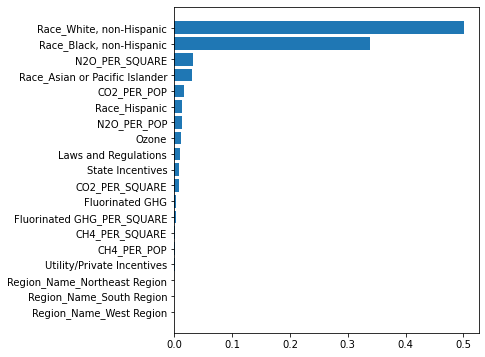

In [79]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(group_0.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Group 1

Segment 1 (yellow):

High Ozone level but low other pollutant emissions, such as WA and MA. The most common group

In [80]:
X = group_1.values[:,1:].copy()
y = group_1.DataValue.values

In [81]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.619
Accuracy on test set: 0.573


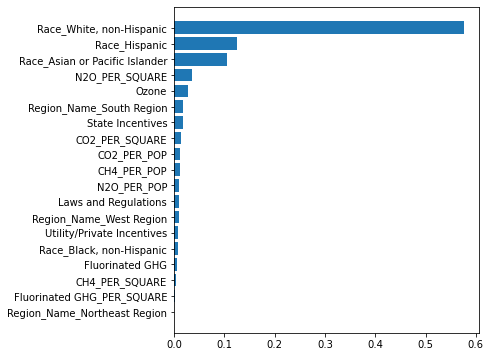

In [82]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(group_1.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Group 2

Segment 2:

High CO2, CH4, N2O, and low regulation or incentives, such as FL and TX

In [83]:
X = group_2.values[:,1:].copy()
y = group_2.DataValue.values

In [84]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.621
Accuracy on test set: 0.498


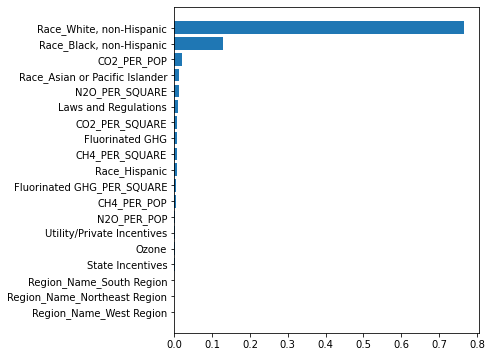

In [85]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(group_2.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Group 3

Segment 3:

High regulation and incentives, such as CA.

In [86]:
X = group_3.values[:,1:].copy()
y = group_3.DataValue.values

In [88]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.593
Accuracy on test set: -0.361


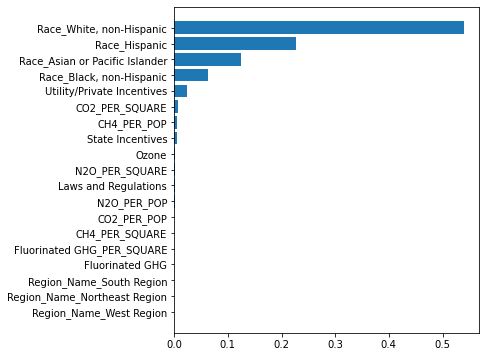

In [89]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(group_3.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()